<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Начальные-настройки-и-инициализация-блокнона" data-toc-modified-id="Начальные-настройки-и-инициализация-блокнона-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Начальные настройки и инициализация блокнона</a></span><ul class="toc-item"><li><span><a href="#Установка-пакетов-библиотек" data-toc-modified-id="Установка-пакетов-библиотек-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Установка пакетов библиотек</a></span></li><li><span><a href="#Импорт-библиотек" data-toc-modified-id="Импорт-библиотек-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Импорт библиотек</a></span></li><li><span><a href="#Глобальные-переменные" data-toc-modified-id="Глобальные-переменные-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Глобальные переменные</a></span></li><li><span><a href="#Функции-общего-назначения" data-toc-modified-id="Функции-общего-назначения-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Функции общего назначения</a></span></li></ul></li><li><span><a href="#Загрузка-датасета" data-toc-modified-id="Загрузка-датасета-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка датасета</a></span><ul class="toc-item"><li><span><a href="#Получение-уникальных-ФИО,-разбивка-на-фамилию,-имя-и-отчество" data-toc-modified-id="Получение-уникальных-ФИО,-разбивка-на-фамилию,-имя-и-отчество-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Получение уникальных ФИО, разбивка на фамилию, имя и отчество</a></span></li></ul></li><li><span><a href="#Подключение-к-локальной-БД-Nebula" data-toc-modified-id="Подключение-к-локальной-БД-Nebula-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подключение к локальной БД Nebula</a></span><ul class="toc-item"><li><span><a href="#Создание-схемы-для-тестового-датасета" data-toc-modified-id="Создание-схемы-для-тестового-датасета-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Создание схемы для тестового датасета</a></span></li><li><span><a href="#Создание-объектов-узлов-и-связей" data-toc-modified-id="Создание-объектов-узлов-и-связей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Создание объектов узлов и связей</a></span></li><li><span><a href="#Заполнение-БД-тестовым-датасетом" data-toc-modified-id="Заполнение-БД-тестовым-датасетом-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Заполнение БД тестовым датасетом</a></span></li></ul></li><li><span><a href="#Запросы-к-БД-на-языке-CQL" data-toc-modified-id="Запросы-к-БД-на-языке-CQL-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Запросы к БД на языке <code>CQL</code></a></span><ul class="toc-item"><li><span><a href="#Получение-фамилий-участников-№2-события,-где-участник-№1-имеет-имя-&quot;Яна&quot;" data-toc-modified-id="Получение-фамилий-участников-№2-события,-где-участник-№1-имеет-имя-&quot;Яна&quot;-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Получение фамилий участников №2 события, где участник №1 имеет имя <code>"Яна"</code></a></span></li><li><span><a href="#Получение-списка-уникальных-имен-всех-участников-и-соответствующее-суммарное-количество-всех-связей-для-этих-имен" data-toc-modified-id="Получение-списка-уникальных-имен-всех-участников-и-соответствующее-суммарное-количество-всех-связей-для-этих-имен-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Получение списка уникальных имен всех участников и соответствующее суммарное количество всех связей для этих имен</a></span></li></ul></li><li><span><a href="#Визуализация-представления-графа-средствами-Networkx" data-toc-modified-id="Визуализация-представления-графа-средствами-Networkx-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Визуализация представления графа средствами <code>Networkx</code></a></span></li></ul></div>

### Начальные настройки и инициализация блокнона

#### Установка пакетов библиотек

In [1]:
!pip install nebula3-python
!pip install networkx

#### Импорт библиотек

In [2]:
import pandas as pd
import requests
import urllib
import json

import itertools
import networkx as nx

from nebula3.gclient.net import ConnectionPool
from nebula3.Config import Config

#### Глобальные переменные

In [3]:
# Globar variables
YD_FOLDER_URL = 'https://disk.yandex.ru/d/s6wWqd8Ol_5IvQ'
YD_FILE_NAME = 'data_test.csv'

#### Функции общего назначения

In [4]:
def get_direct_path_yadisk(folder_url, filename):
    '''
    makes a direct link (for download) to the file located in the Yandex disk public link
    '''
    url = ('https://cloud-api.yandex.net/v1/disk/public/resources/download' +
           '?public_key=' + urllib.parse.quote(folder_url) + '&path=/' + 
           urllib.parse.quote(filename))
    r = requests.get(url) 
    return json.loads(r.text)['href']    

### Загрузка датасета

In [5]:
df_test = pd.read_csv(get_direct_path_yadisk(YD_FOLDER_URL, YD_FILE_NAME),
                      sep=';', error_bad_lines=False)

In [ ]:
df_test.info()

In [6]:
df_test.columns = ['action_id', 'fio_1', 'fio_2']

In [7]:
df_test.head(10)

,action_id,fio_1,fio_2
0,189,Галчевская Карина Владимировна,Белоновская Анастасия Семеновна
1,206,Офицеров Олег Романович,Сапожник Борис Валерьевич
2,445,Жандарова Лариса Германовна,Чемодуров Дамир Русланович
3,503,Масимова Яна Дамировна,Мингажетдинов Рамиль Семенович
4,571,Мухтарова Алена Яковлевна,Щербатенко Ольга Робертовна
5,595,Русских Кира Константиновна,Федутинов Артем Артурович
6,637,Федонкина Кристина Маратовна,Маргиев Григорий Иванович
7,741,Чернолусская Екатерина Марселевна,Бухановская Лидия Радиковна
8,996,Оранский Владимир Артурович,Скотников Виктор Ильич
9,1210,Ардатов Андрей Анатольевич,Ханыгин Дмитрий Юрьевич


Датасет представляет собой таблицу с 5000 записями
- action_id	 - ID события
- fio_1	 - ФИО участника № 1 события
- fio_2	 - ФИО участника № 2 события

Для построения графа используем следующую струтуру:
- Вершина (узел, точка)  - участник с уникальным ИД = ФИО и свойствами (Фамилия, Имя и Отчество)
- Ребро (линия, связь) - Событие с уникальным ИД = ИД события, с направлением согласно исходной таблице

#### Получение уникальных ФИО, разбивка на фамилию, имя и отчество

In [8]:
df_unique_names = pd.DataFrame(columns=['fullname', 'lastname', 'firstname', 'surname'])
df_unique_names['fullname'] = df_test['fio_2'].append(df_test['fio_1']).unique()
df_unique_names[['lastname', 'firstname', 'surname']] = df_unique_names['fullname'].str.split(' ', expand=True)

In [9]:
max_fullname_len = max(df_unique_names.fullname.str.len())
print(f'Максимальная длина полного имени участника: {max_fullname_len} символов')
max_fullname_len *= 2
print(f'Принята длина идентификатора узла БД: {max_fullname_len} символов')

Максимальная длина полного имени участника: 37 символов
Принята длина идентификатора узла БД: 74 символов


### Подключение и работа с БД `Nebula`

Экземпляр БД запущен локально, в контейнере Docker

Для работы с БД используем nebula-python и язык запросов CQL +nGQL

In [10]:
# define a config
config = Config()
config.max_connection_pool_size = 10
# init connection pool
connection_pool = ConnectionPool()
# if the given servers are ok, return true, else return false
ok = connection_pool.init([('127.0.0.1', 9669)], config)

In [11]:
session = connection_pool.get_session('root', 'nebula')

#### Создание схемы для тестового датасета

In [12]:
session.execute(f'DROP SPACE IF EXISTS csv;\n\
                  CREATE SPACE IF NOT EXISTS csv(partition_num=10, replica_factor=1,\n\
                  vid_type=FIXED_STRING({max_fullname_len}));\n\
                  USE csv;');

#### Создание объектов узлов и связей используя язык `nGQL`

In [13]:
session.execute('CREATE TAG IF NOT EXISTS member(lastname string, firstname string, surname string);\n\
                 CREATE EDGE IF NOT EXISTS action(action_id int)');

#### Заполнение БД датасетом из источника

In [14]:
for row in df_unique_names.itertuples():
    session.execute(f'INSERT VERTEX member(lastname, firstname, surname) \
                      VALUES "{row[1]}":("{row[2]}", "{row[3]}", "{row[4]}");')
    print(f'Adding tag {row[0]+1} of {len(df_unique_names)}', end='\r')

In [15]:
session.execute('CREATE TAG INDEX IF NOT EXISTS i_member ON member();')

ResultSet(None)

In [16]:
for row in df_test.itertuples():
    session.execute(f'INSERT EDGE action(action_id) VALUES "{row[2]}"->"{row[3]}":({row[1]})')
    print(f'Adding edge {row[0]+1} of {len(df_test)}', end='\r')

In [17]:
session.execute('REBUILD TAG INDEX i_member;')

ResultSet(keys: ['New Job Id'], values: [29])

### Запросы к БД на языке `CQL`

#### Получение фамилий участников №2 события, где участник №1 имеет имя "Яна"

In [18]:
session.execute('MATCH (m1:member {firstname:"Яна"})-[:action]->(m2) RETURN m2.member.lastname;')

ResultSet(keys: ['m2.member.lastname'], values: ["Ладыжинская"],["Шарафетдинов"],["Лагунов"],["Григоревский"],["Карьков"],["Безчастнов"],["Янкович"],["Делюсина"],["Крутилин"],["Сива"],["Бондарчук"],["Шатунина"],["Мазлумова"],["Слудская"],["Буцкий"],["Прядкин"],["Пимашин"])

#### Получение списка уникальных имен всех участников и соответствующее суммарное количество всех связей для этих имен

In [19]:
session.execute('MATCH (m1:member {firstname:"Яна"})-[:action]->(m2) RETURN m2.member.lastname;')

ResultSet(keys: ['m2.member.lastname'], values: ["Делюсина"],["Лагунов"],["Каченовский"],["Ергина"],["Сарманов"],["Шарафетдинов"],["Горбова"],["Веткова"],["Крутилин"],["Сива"],["Бондарчук"],["Конова"],["Янкович"],["Ладыжинская"],["Прядкин"],["Безчастнов"],["Буцкий"],["Лычкина"],["Карьков"],["Мазлумова"],["Шатунина"],["Путник"],["Баскаев"],["Карпушенко"],["Пимашин"],["Слудская"],["Григоревский"],["Салтырева"])

### Визуализация представления графа средствами `NetworkХ`

In [20]:
G = nx.Graph()

In [82]:
G = nx.from_pandas_edgelist(df_test, source='fio_1', target='fio_2', ['action_id'])
G_small = nx.from_pandas_edgelist(df_test.head(10), 'fio_1', 'fio_2', ['action_id'])

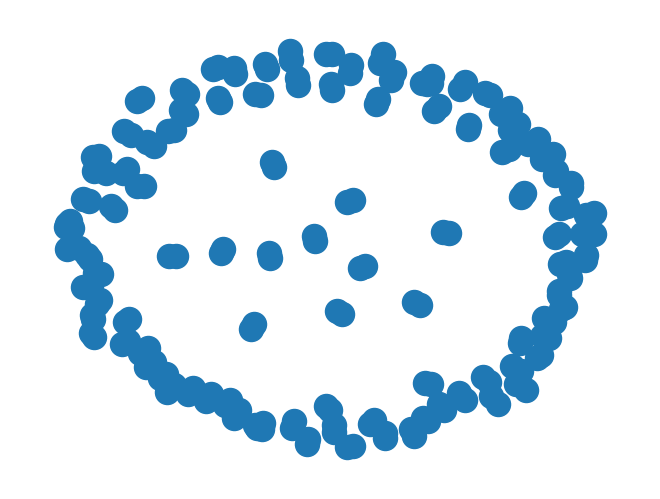

In [40]:
import matplotlib.pyplot as plt
nx.draw(G_small)  # networkx draw()
plt.draw()  # pyplot draw()

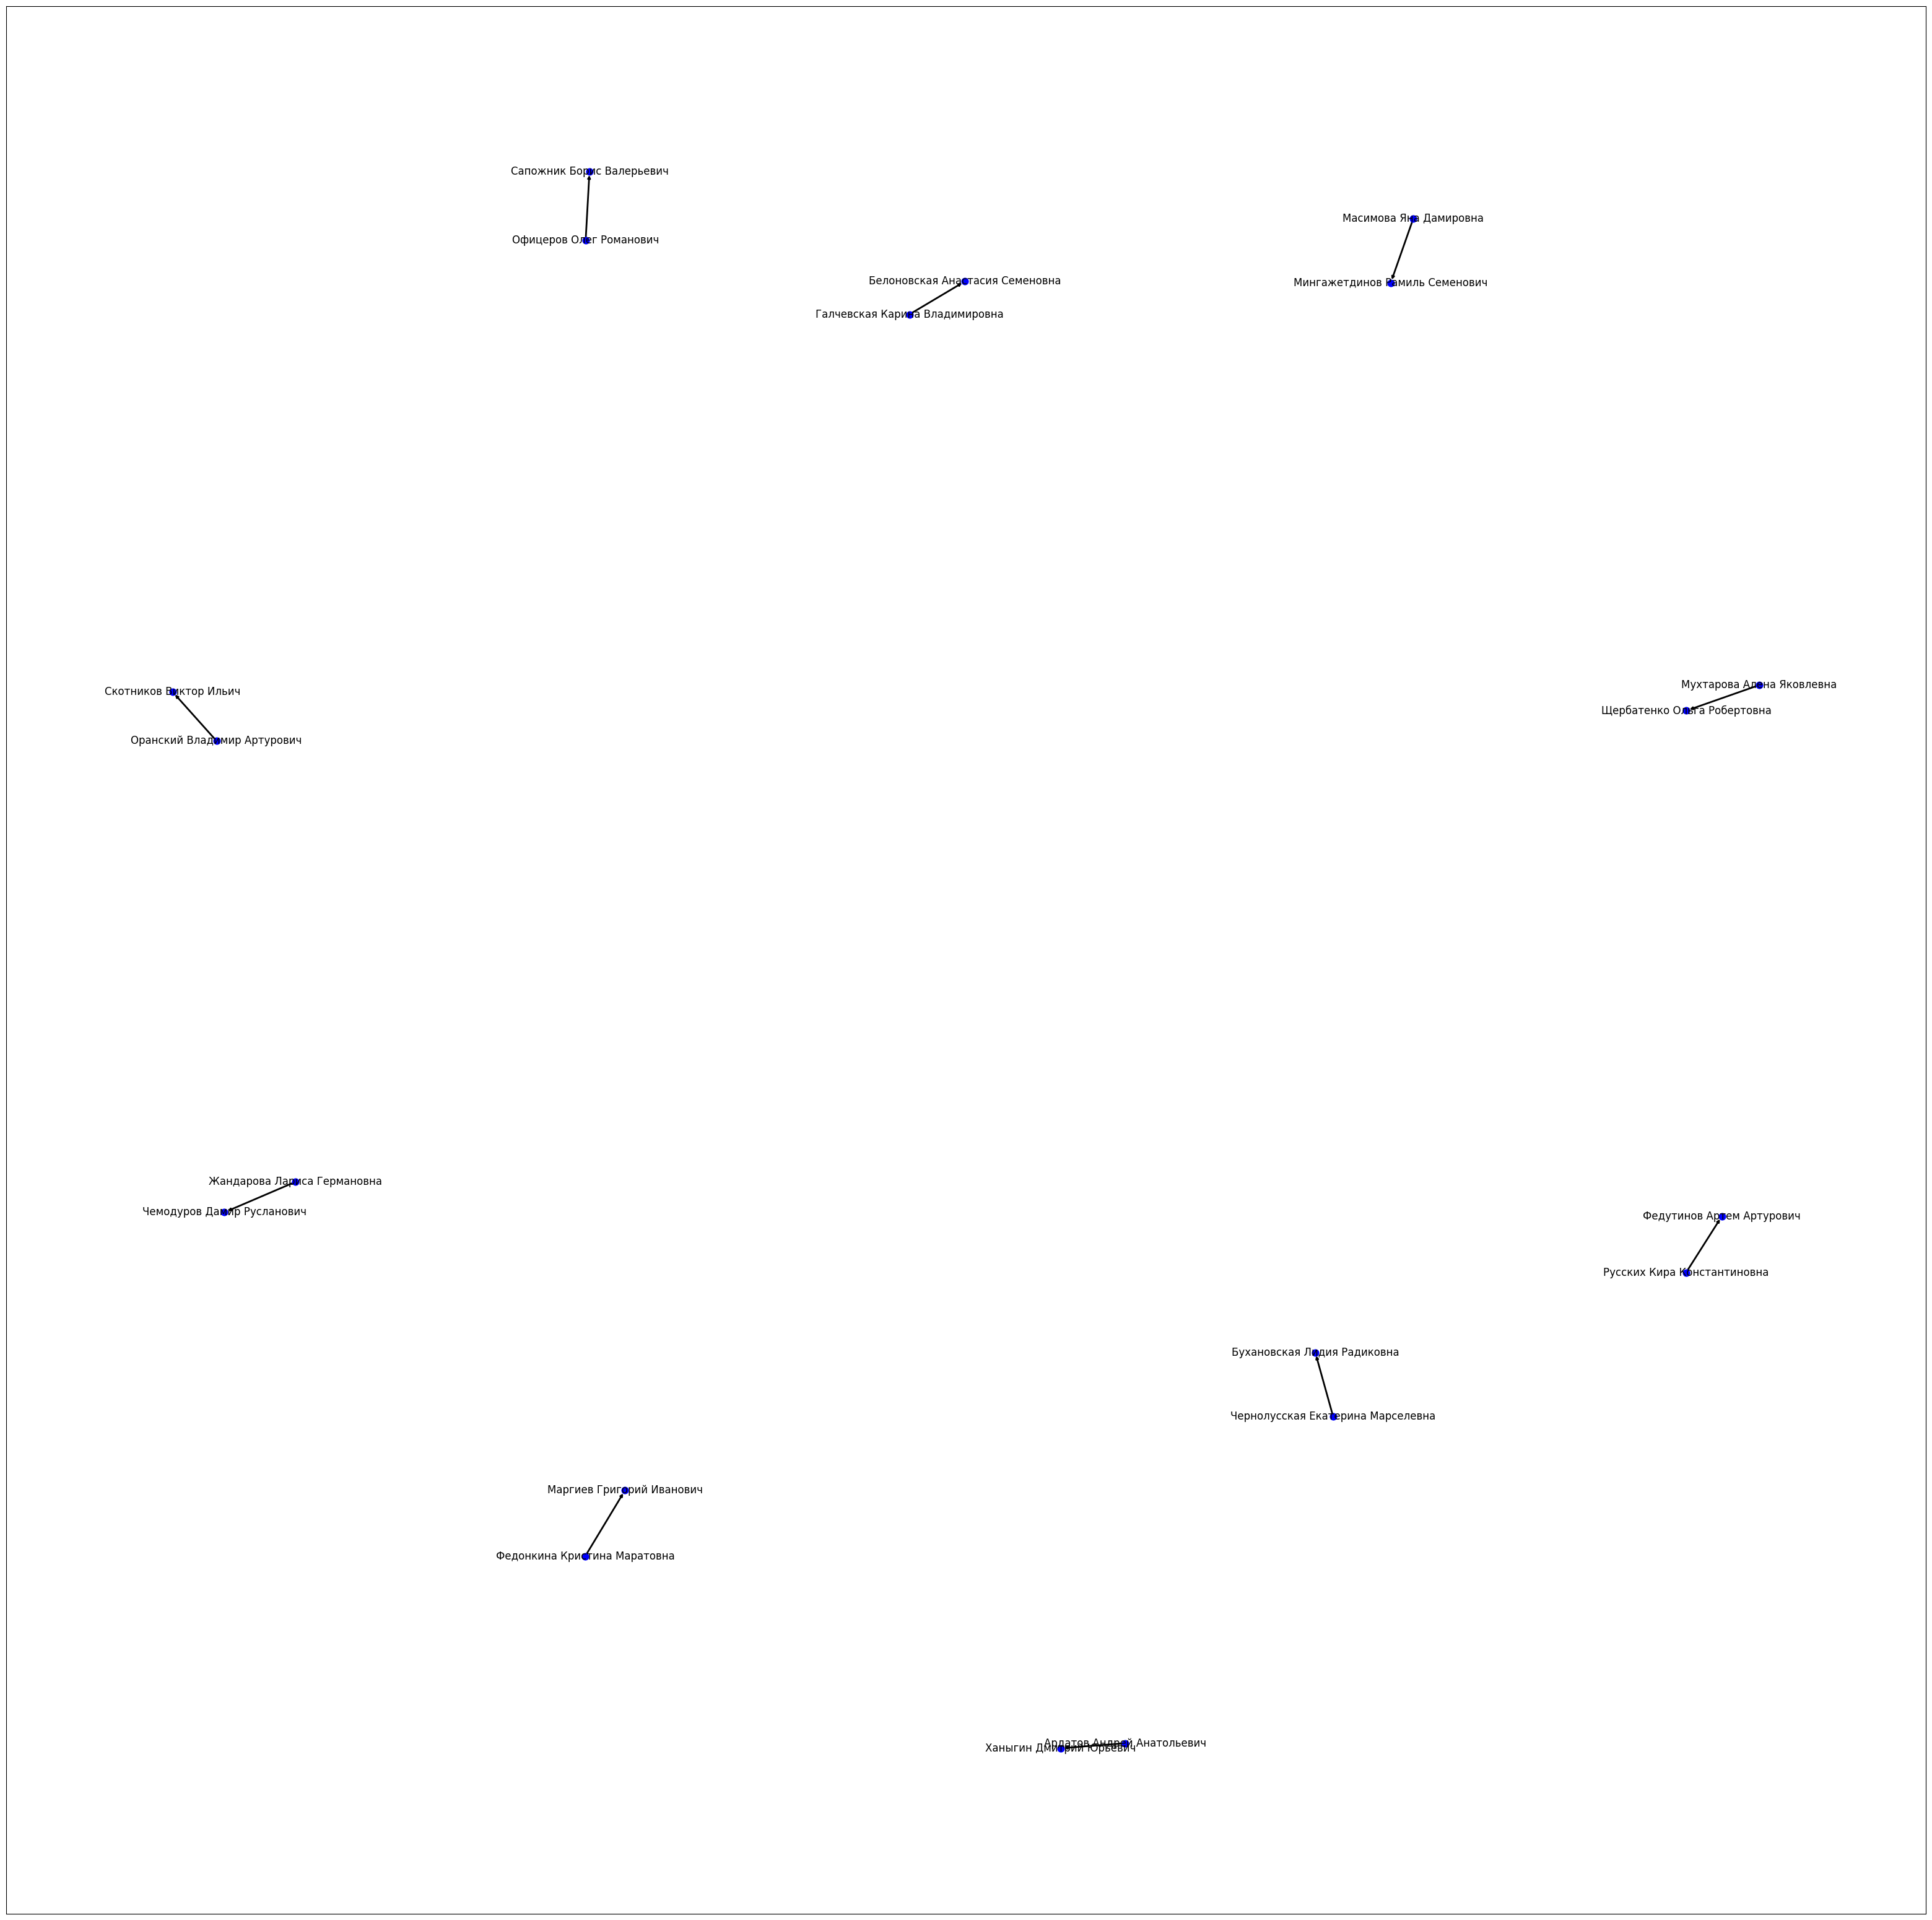

In [84]:
options = {
    'node_color': 'blue',
    'node_size': 60,
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 6,
    'alpha': 1
}
plt.figure(3,figsize=(40,40)) 
nx.draw_networkx(G_small, arrows=True, with_labels=True, **options)
plt.savefig('g_small.png')
plt.show()

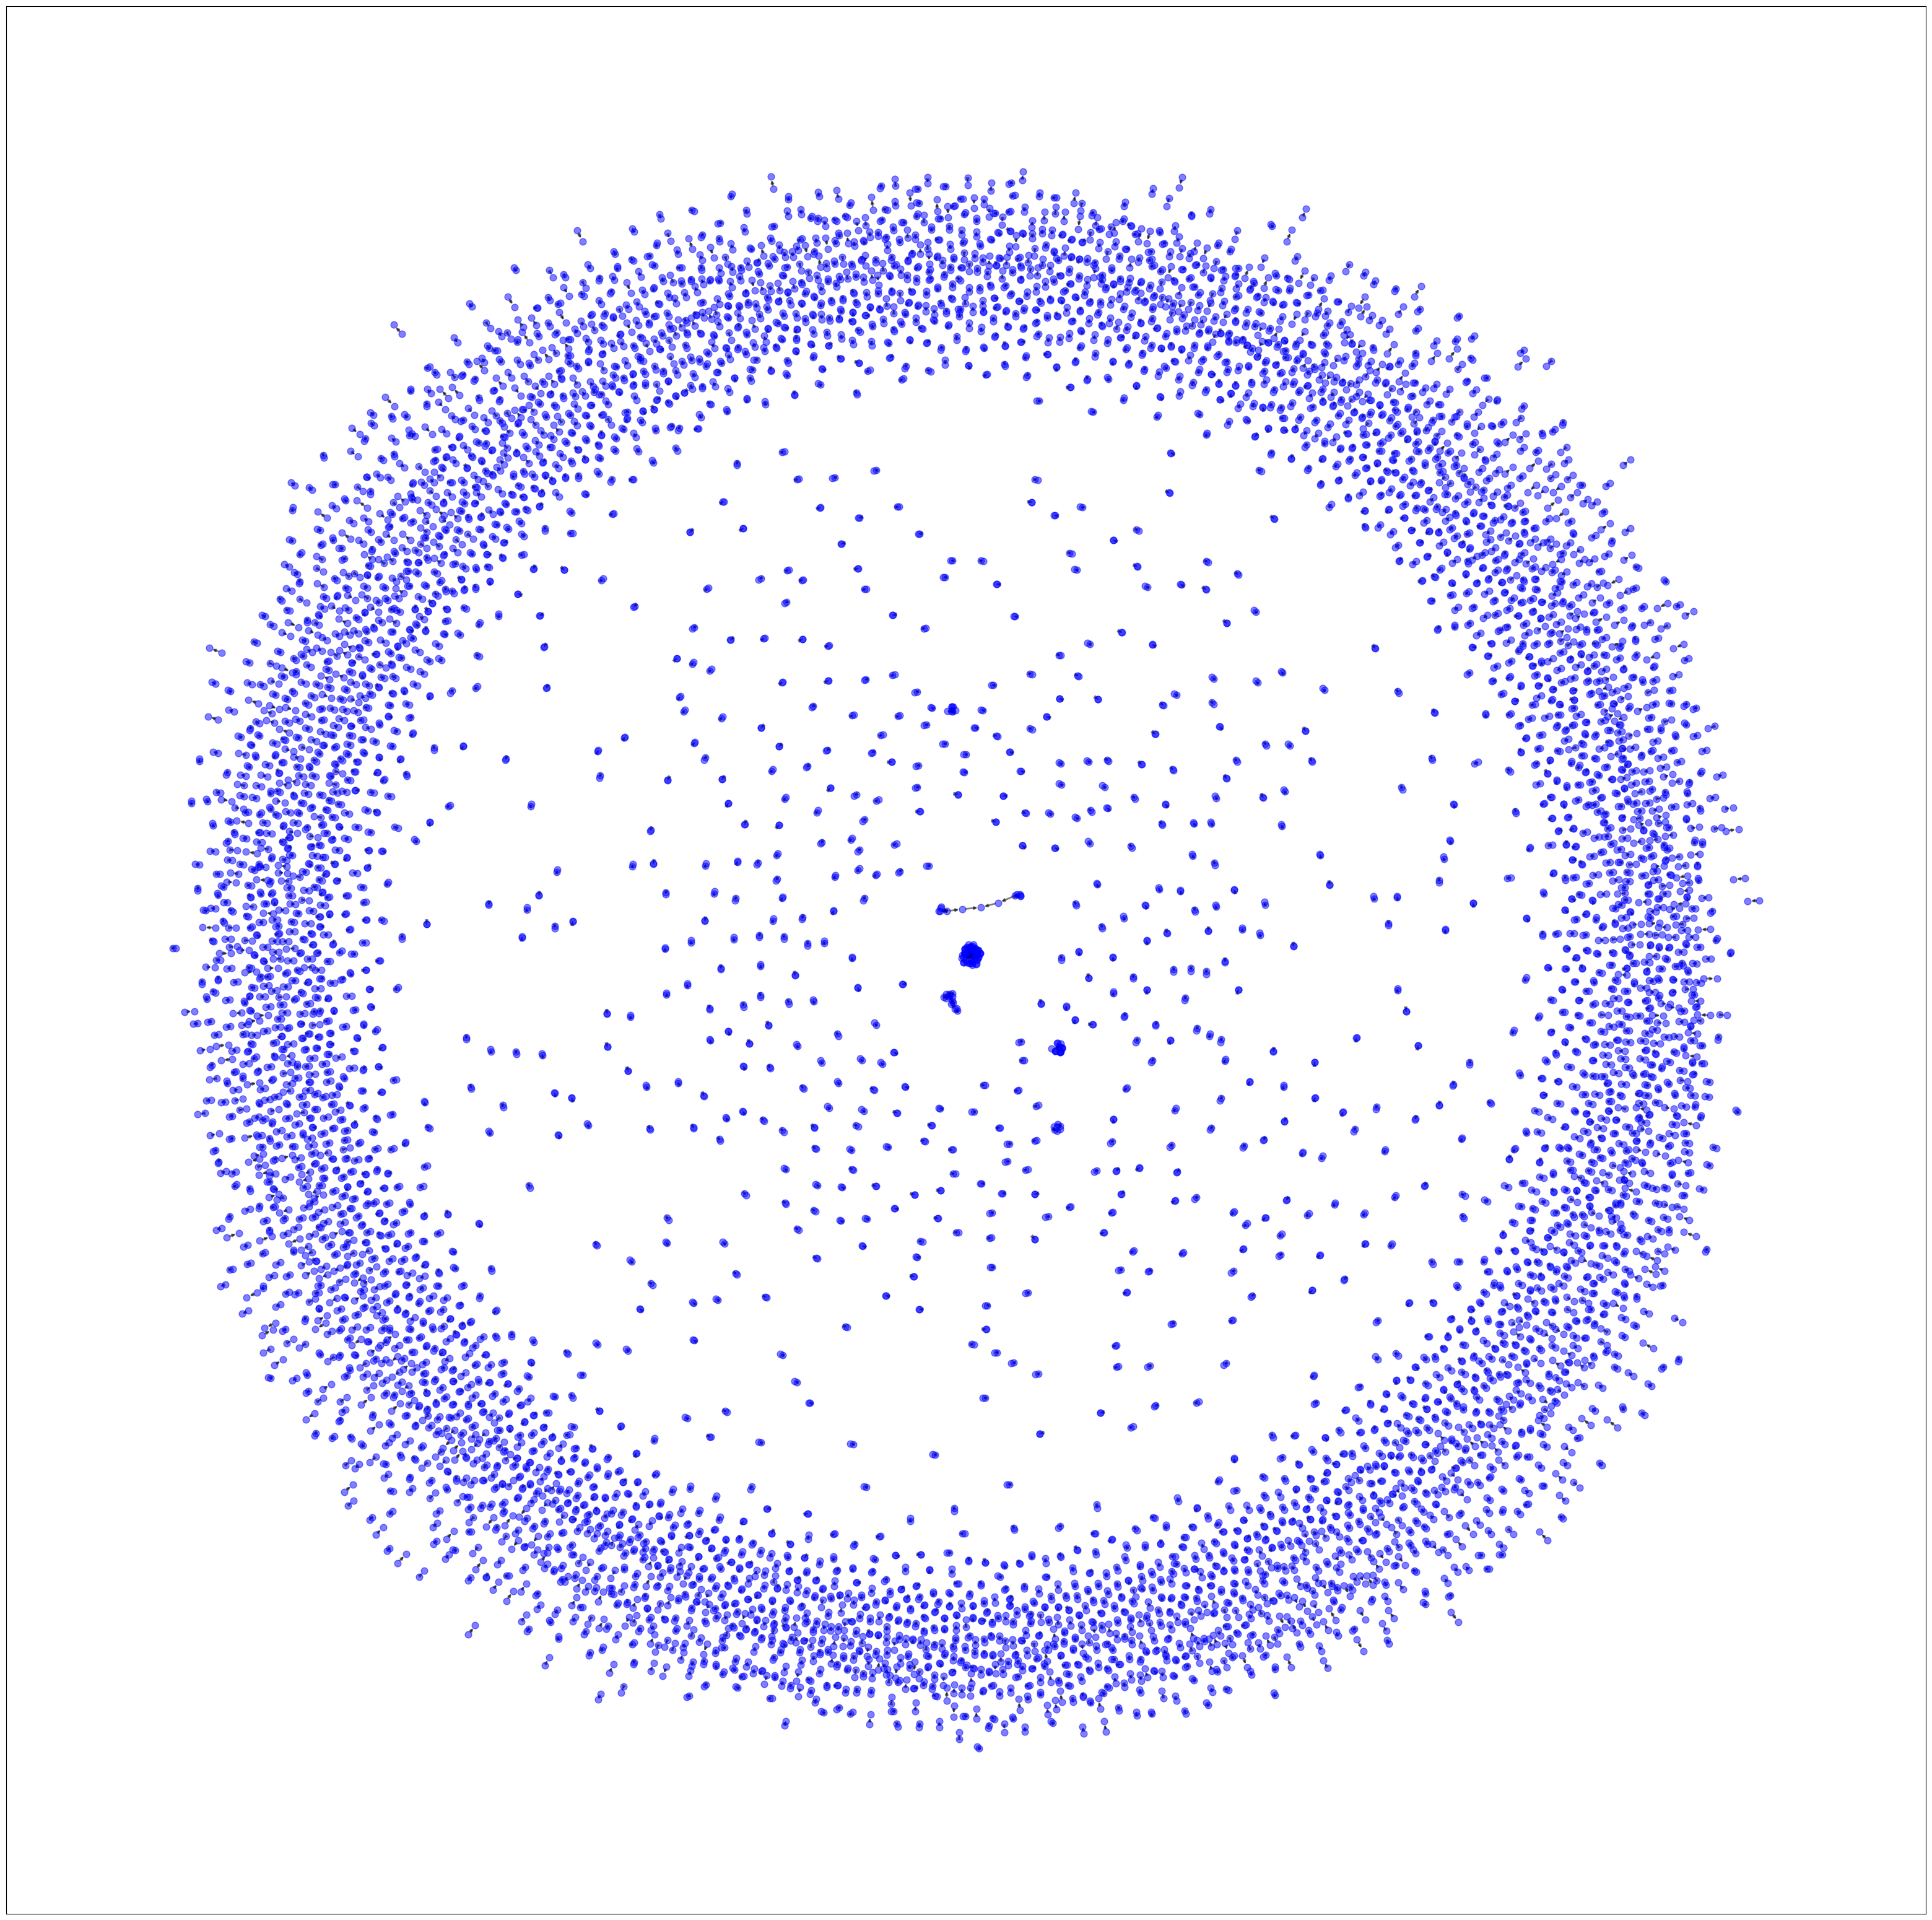

In [81]:
options = {
    'node_color': 'blue',
    'node_size': 60,
    'width': 2,
    'arrowstyle': '-|>',
    'arrowsize': 6,
    'alpha': .5
}
plt.figure(3,figsize=(40,40)) 
nx.draw_networkx(G, arrows=True, with_labels=False, **options)
plt.savefig('g_full.png')
plt.show()

Визуализация показывает размещение узлов графа с позициями, определенными по алгоритму направленной силы Фрухтермана-Рейнгольда (пружинная модель)

Распределение показывает большое количество узлов равноудаленных от центра, то есть практически не имеющих связей с узлами, расположенными в центре графического представления. Расположенные в центре узлы образуют несколько групп, которые выделены на изображении ниже.

In [29]:
comp = nx.algorithms.community.girvan_newman(G)
k = 7
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
#communities = list(limited)[-1]

In [35]:
from networkx.algorithms.community import greedy_modularity_communities
c = greedy_modularity_communities(G)
c

[frozenset({'Абаренов Ильдар Робертович',
            'Айдамирова Карина Антоновна',
            'Акодес Ефим Анатольевич',
            'Аксанова Кристина Григорьевна',
            'Алипичев Евгений Тимурович',
            'Андриевская Марина Ринатовна',
            'Арбачаков Филипп Андреевич',
            'Ахромеева Алина Ивановна',
            'Бекрева Виктория Яковлевна',
            'Белогорлов Дамир Кириллович',
            'Близняков Иван Артемович',
            'Бобрецова Светлана Артемовна',
            'Бодрякова Евгения Яновна',
            'Борголов Евгений Маратович',
            'Бордачев Никита Васильевич',
            'Бугаенкова Карина Аркадьевна',
            'Вохменцев Владимир Владиславович',
            'Гужов Глеб Данилович',
            'Домогаров Антон Максимович',
            'Дудыкина Мария Романовна',
            'Думлер Людмила Вячеславовна',
            'Жубанов Анатолий Иванович',
            'Камилов Дамир Павлович',
            'Камчадалов Артем Ярославо

In [31]:
for communities in limited:
    print(tuple(sorted(c) for c in communities)) 


communities

community_dict = {}
community_num = 0
for community in communities:
    for character in community:
        community_dict[character] = community_num
        community_num += 1
        nx.set_node_attributes(G, community_dict, 'community')

In [ ]:
print('edges: ', list(G.edges))